# Set up data

## Import libraries: Beautiful soup, requests, and re (For regular expressions)

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Getting Data From BBC Lists

## THE FIRST LIST - scraping the list of 100 greatest films directed by women 

In [16]:
bbc_url = "https://www.bbc.com/culture/article/20191125-the-100-greatest-films-directed-by-women-poll"

In [17]:
response = requests.get(bbc_url, headers={'User-Agent': 'Mozilla/5.0'})
bbc_html = BeautifulSoup(response.content, 'html.parser')

### 1. find all movie titles and directors and put them into a list of dictionaries - title, director, and year

In [18]:
movie_paragraphs = bbc_html.find_all('p', class_='sc-9a00e533-0 hxuGS')

movie_data = []

for movie in movie_paragraphs:
    text = movie.get_text(strip=True)
    match = re.match(r'(\d+)\.\s*(.*?)\s*\((.*?),\s*(\d{4})\)', text)
    
    if match:
        title = match.group(2).strip()
        director = match.group(3).strip()
        year = match.group(4)
        title = ' '.join(title.split())
        
        movie_data.append({
            'title': title,
            'director': director,
            'year': year
        })

### 2. merge each film's webpage from IMDb

#### write the function of getting imdb link

In [42]:
def get_imdb_link(title, year):
    base_url = "https://www.imdb.com"
    search_url = f"{base_url}/find/?q={title.replace(' ', '+')}+{year}"
    
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        response = requests.get(search_url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        result = soup.find('a', class_='ipc-metadata-list-summary-item__t')
        
        if result:
            return base_url + result['href'].split('?')[0] 
        return None
    except Exception as e:
        print(f"Error searching for {title}: {e}")
        return None

#### create a loop to print each movie's link 

In [ ]:
for movie in movie_data:
    link = get_imdb_link(movie['title'], movie['year'])
    movie['link'] = link  

In [67]:
# checkpoint - if everything is loaded correctly
movie_data

[{'title': 'The Kids are All Right',
  'director': 'Lisa Cholodenko',
  'year': '2010',
  'link': 'https://www.imdb.com/title/tt0842926/',
  'rating': '7.0',
  'wins': 29,
  'nominations': 133},
 {'title': 'The Souvenir',
  'director': 'Joanna Hogg',
  'year': '2019',
  'link': 'https://www.imdb.com/title/tt6920356/',
  'rating': '6.4',
  'wins': 7,
  'nominations': 37},
 {'title': 'Somewhere',
  'director': 'Sofia Coppola',
  'year': '2010',
  'link': 'https://www.imdb.com/title/tt1421051/',
  'rating': '6.3',
  'wins': 4,
  'nominations': 8},
 {'title': 'Adoption',
  'director': 'Márta Mészáros',
  'year': '1975',
  'link': 'https://www.imdb.com/title/tt0073948/',
  'rating': '7.2',
  'wins': 4,
  'nominations': 1},
 {'title': 'The Meetings of Anna',
  'director': 'Chantal Akerman',
  'year': '1977',
  'link': 'https://www.imdb.com/title/tt4441280/',
  'rating': '5.9',
  'wins': None,
  'nominations': None},
 {'title': 'Ritual in Transfigured Time',
  'director': 'Maya Deren',
  'yea

In [46]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

#### extract each film's rating

In [47]:
for movie in movie_data:
    try:
        response = requests.get(movie['link'], headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Try both possible rating locations
        rating = soup.find(class_='sc-d541859f-1 imUuxf').get_text(strip=True)
        
        movie['rating'] = rating if rating else "N/A"
        
    except Exception as e:
        print(f"Error getting rating for {movie['title']}: {str(e)}")
        movie['rating'] = "N/A"

Error getting rating for The Long Farewell: 'NoneType' object has no attribute 'get_text'
Error getting rating for The Headless Woman: 'NoneType' object has no attribute 'get_text'


#### correct wrong links

In [48]:
corrected = {
    'The Long Farewell': 'https://www.imdb.com/title/tt0092905/',
    'The Headless Woman': 'https://www.imdb.com/title/tt1221141/',
}

for movie in movie_data:
    title = movie['title']
    if title in corrected:
        movie['link'] = corrected[title]

In [49]:
# second checkpoint
movie_data

[{'title': 'The Kids are All Right',
  'director': 'Lisa Cholodenko',
  'year': '2010',
  'link': 'https://www.imdb.com/title/tt0842926/',
  'rating': '7.0'},
 {'title': 'The Souvenir',
  'director': 'Joanna Hogg',
  'year': '2019',
  'link': 'https://www.imdb.com/title/tt6920356/',
  'rating': '6.4'},
 {'title': 'Somewhere',
  'director': 'Sofia Coppola',
  'year': '2010',
  'link': 'https://www.imdb.com/title/tt1421051/',
  'rating': '6.3'},
 {'title': 'Adoption',
  'director': 'Márta Mészáros',
  'year': '1975',
  'link': 'https://www.imdb.com/title/tt0073948/',
  'rating': '7.2'},
 {'title': 'The Meetings of Anna',
  'director': 'Chantal Akerman',
  'year': '1977',
  'link': 'https://www.imdb.com/title/tt4441280/',
  'rating': '5.9'},
 {'title': 'Ritual in Transfigured Time',
  'director': 'Maya Deren',
  'year': '1946',
  'link': 'https://www.imdb.com/title/tt0038885/',
  'rating': '6.9'},
 {'title': 'News From Home',
  'director': 'Chantal Akerman',
  'year': '1977',
  'link': 'h

### 3. write a function that extracts the number of wins and nominations

In [ ]:
def extract_wins_nominations(awards_text):
    match = re.search(r'(\d+)\s*wins?\s*&\s*(\d+)\s*nominations?', awards_text)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

for movie in movie_data:
    if not movie.get('link'):
        movie['wins'] = None
        movie['nominations'] = None
        continue
    
    try:       
        response = requests.get(movie['link'], headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        awards_span = soup.find('span', class_='ipc-metadata-list-item__list-content-item')
        
        if awards_span:
            awards_text = awards_span.get_text(strip=True)
            wins, nominations = extract_wins_nominations(awards_text)
            
            movie['wins'] = wins
            movie['nominations'] = nominations

        else:
            movie['wins'] = None
            movie['nominations'] = None
            
    except Exception as e:
        print(f"Error processing {movie.get('title', 'Unknown')}: {str(e)}")
        movie['wins'] = None
        movie['nominations'] = None

In [58]:
# third checkpoint
movie_data

[{'title': 'The Kids are All Right',
  'director': 'Lisa Cholodenko',
  'year': '2010',
  'link': 'https://www.imdb.com/title/tt0842926/',
  'rating': '7.0',
  'wins': 29,
  'nominations': 133},
 {'title': 'The Souvenir',
  'director': 'Joanna Hogg',
  'year': '2019',
  'link': 'https://www.imdb.com/title/tt6920356/',
  'rating': '6.4',
  'wins': 7,
  'nominations': 37},
 {'title': 'Somewhere',
  'director': 'Sofia Coppola',
  'year': '2010',
  'link': 'https://www.imdb.com/title/tt1421051/',
  'rating': '6.3',
  'wins': 4,
  'nominations': 8},
 {'title': 'Adoption',
  'director': 'Márta Mészáros',
  'year': '1975',
  'link': 'https://www.imdb.com/title/tt0073948/',
  'rating': '7.2',
  'wins': 4,
  'nominations': 1},
 {'title': 'The Meetings of Anna',
  'director': 'Chantal Akerman',
  'year': '1977',
  'link': 'https://www.imdb.com/title/tt4441280/',
  'rating': '5.9',
  'wins': None,
  'nominations': None},
 {'title': 'Ritual in Transfigured Time',
  'director': 'Maya Deren',
  'yea

In [78]:
df_females = pd.DataFrame(movie_data)

In [79]:
df_females.to_csv('females_list.csv', index=False)

## THE SECOND LIST - 100 Greatest Film 
### Given most films in this list are directed by male, scraping below aims to compare the statistics with the list of best films made by women.

In [26]:
main_url = "https://www.bbc.com/culture/article/20160819-the-21st-centurys-100-greatest-films"

In [30]:
response_main = requests.get(main_url, headers={'User-Agent': 'Mozilla/5.0'})
main_html = BeautifulSoup(response_main.content, 'html.parser')

### 1. find all movie titles and directors and put them into a list of dictionaries - title, director, and year

In [31]:
main_paragraphs = main_html.find_all('p', class_='sc-9a00e533-0 hxuGS')

# Initialize list to store movie data
main_data = []

for each in main_paragraphs:
    text = each.get_text(strip=True)
    
    # Use regex to extract the components
    match = re.match(r'(\d+)\.\s*(.*?)\s*\((.*?),\s*(\d{4})\)', text)
    
    if match:
        title = match.group(2).strip()
        director = match.group(3).strip()
        year = match.group(4)
        
        # Clean up any extra whitespace or non-breaking spaces in the title
        title = ' '.join(title.split())
        
        main_data.append({
            'title': title,
            'director': director,
            'year': year
        })

### 2. merge each film's webpage from IMDb

#### use the function, get_imdb_link, which I set up earlier to get links for films in this list

In [50]:
for movie in main_data:
    link = get_imdb_link(movie['title'], movie['year'])
    movie['link'] = link  

In [51]:
# checkpoint
main_data

[{'title': 'Toni Erdmann',
  'director': 'Maren Ade',
  'year': '2016',
  'link': 'https://www.imdb.com/title/tt4048272/'},
 {'title': 'Requiem for a Dream',
  'director': 'Darren Aronofsky',
  'year': '2000',
  'link': 'https://www.imdb.com/title/tt0180093/'},
 {'title': 'Carlos',
  'director': 'Olivier Assayas',
  'year': '2010',
  'link': 'https://www.imdb.com/title/tt1321865/'},
 {'title': 'The Gleaners and I',
  'director': 'Agnès Varda',
  'year': '2000',
  'link': 'https://www.imdb.com/title/tt0247380/'},
 {'title': 'Ten',
  'director': 'Abbas Kiarostami',
  'year': '2002',
  'link': 'https://www.imdb.com/title/tt0301978/'},
 {'title': 'White Material',
  'director': 'Claire Denis',
  'year': '2009',
  'link': 'https://www.imdb.com/title/tt1135952/'},
 {'title': 'Finding Nemo',
  'director': 'Andrew Stanton',
  'year': '2003',
  'link': 'https://www.imdb.com/title/tt0266543/'},
 {'title': 'Moonrise Kingdom',
  'director': 'Wes Anderson',
  'year': '2012',
  'link': 'https://www.

#### extract each film's rating

In [52]:
for movie in main_data:
    try:
        response = requests.get(movie['link'], headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Try both possible rating locations
        rating = soup.find(class_='sc-d541859f-1 imUuxf').get_text(strip=True)
        
        movie['rating'] = rating if rating else "N/A"
        
    except Exception as e:
        print(f"Error getting rating for {movie['title']}: {str(e)}")
        movie['rating'] = "N/A"

Error getting rating for The Headless Woman: 'NoneType' object has no attribute 'get_text'
Error getting rating for The Diving Bell and the Butterfly: 'NoneType' object has no attribute 'get_text'
Error getting rating for Moolaadé: 'NoneType' object has no attribute 'get_text'


#### correct those films that incorrectly merged with wrong links

In [53]:
corrected_main = {
    'The Diving Bell and the Butterfly': 'https://www.imdb.com/title/tt0401383/',
    'The Headless Woman': 'https://www.imdb.com/title/tt1221141/',
    'Moolaadé': 'https://www.imdb.com/title/tt0416991/'
}

for movie in main_data:
    title = movie['title']
    if title in corrected:
        movie['link'] = corrected_main[title]

### 3. use the function earlier, extract the number of nominations and wins for each film

In [59]:
for movie in main_data:
    if not movie.get('link'):
        movie['wins'] = None
        movie['nominations'] = None
        continue
    
    try:       
        response = requests.get(movie['link'], headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        awards_span = soup.find('span', class_='ipc-metadata-list-item__list-content-item')
        
        if awards_span:
            awards_text = awards_span.get_text(strip=True)
            wins, nominations = extract_wins_nominations(awards_text)
            
            movie['wins'] = wins
            movie['nominations'] = nominations

        else:
            movie['wins'] = None
            movie['nominations'] = None
            
    except Exception as e:
        print(f"Error processing {movie.get('title', 'Unknown')}: {str(e)}")
        movie['wins'] = None
        movie['nominations'] = None

In [68]:
# checkpoint
main_data

[{'title': 'Toni Erdmann',
  'director': 'Maren Ade',
  'year': '2016',
  'link': 'https://www.imdb.com/title/tt4048272/',
  'rating': '7.3',
  'wins': 59,
  'nominations': 85},
 {'title': 'Requiem for a Dream',
  'director': 'Darren Aronofsky',
  'year': '2000',
  'link': 'https://www.imdb.com/title/tt0180093/',
  'rating': '8.3',
  'wins': 37,
  'nominations': 69},
 {'title': 'Carlos',
  'director': 'Olivier Assayas',
  'year': '2010',
  'link': 'https://www.imdb.com/title/tt1321865/',
  'rating': '7.6',
  'wins': 18,
  'nominations': 49},
 {'title': 'The Gleaners and I',
  'director': 'Agnès Varda',
  'year': '2000',
  'link': 'https://www.imdb.com/title/tt0247380/',
  'rating': '7.7',
  'wins': 16,
  'nominations': 3},
 {'title': 'Ten',
  'director': 'Abbas Kiarostami',
  'year': '2002',
  'link': 'https://www.imdb.com/title/tt0301978/',
  'rating': '7.4',
  'wins': 1,
  'nominations': 4},
 {'title': 'White Material',
  'director': 'Claire Denis',
  'year': '2009',
  'link': 'https

#### save as csv

In [82]:
df_all = pd.DataFrame(main_data)

In [83]:
df_all.to_csv('list_all.csv', index=False)

# Scraping Rotten Tomatos (for a detailed breakdown of which genre we see the most growth and pronominence of female directors)

## 1. Set up a loop that PRINTS titles and directors

In [62]:
base_url = "https://editorial.rottentomatoes.com/guide/best-movies-directed-by-women-of-the-21st-century/{}/"
movies = []

for page_num in range(1, 4): 
    url = base_url.format(page_num)
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Loop through each movie container
    for movie in soup.find_all('div', class_='countdown-item'):
        # Extract title and year
        title_div = movie.find('div', class_='article_movie_title')
        title = title_div.h2.a.text.strip() if title_div else "N/A"
        year = title_div.find('span', class_='subtle start-year').text.strip('()') if title_div else "N/A"
        
        # Extract director (from separate div)
        details_div = movie.find('div', class_='countdown-item-details')
        director_div = details_div.find('div', class_='info director') if details_div else None
        director = director_div.a.text.strip() if director_div and director_div.a else "N/A"
        
        movies.append({
            "Title": title,
            "Year": year,
            "Director": director
        })

In [63]:
# checkpoint
movies

[{'Title': 'The Substance', 'Year': '2024', 'Director': 'Coralie Fargeat'},
 {'Title': 'My Old Ass', 'Year': '2024', 'Director': 'Megan Park'},
 {'Title': 'Love Lies Bleeding', 'Year': '2024', 'Director': 'Rose Glass'},
 {'Title': 'The Fire Inside', 'Year': '2024', 'Director': 'Rachel Morrison'},
 {'Title': "The Devil's Bath", 'Year': '2024', 'Director': 'Veronika Franz'},
 {'Title': 'Vermiglio', 'Year': '2024', 'Director': 'Maura Delpero'},
 {'Title': 'In the Summers',
  'Year': '2024',
  'Director': 'Alessandra Lacorazza Samudio'},
 {'Title': 'Santosh', 'Year': '2024', 'Director': 'Sandhya Suri'},
 {'Title': 'Black Box Diaries', 'Year': '2024', 'Director': 'Shiori Ito'},
 {'Title': 'Good One', 'Year': '2024', 'Director': 'India Donaldson'},
 {'Title': 'Girls Will Be Girls', 'Year': '2024', 'Director': 'Shuchi Talati'},
 {'Title': 'Ghostlight', 'Year': '2024', 'Director': "Kelly O'Sullivan"},
 {'Title': 'On Becoming a Guinea Fowl',
  'Year': '2024',
  'Director': 'Rungano Nyoni'},
 {'

## 2. Merge information from IMDB - adding links to their individual pages

### bring the same function earlier

In [64]:
def get_imdb_link(title, year):
    base_url = "https://www.imdb.com"
    search_url = f"{base_url}/find/?q={title.replace(' ', '+')}+{year}"
    
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        response = requests.get(search_url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        result = soup.find('a', class_='ipc-metadata-list-summary-item__t')
        
        if result:
            return base_url + result['href'].split('?')[0] 
        return None
    except Exception as e:
        print(f"Error searching for {title}: {e}")
        return None


### extract each individual film's IMDb page

In [66]:
for movie in movies:
    link = get_imdb_link(movie['Title'], movie['Year'])
    movie['Link'] = link

[{'Title': 'The Substance', 'Year': '2024', 'Director': 'Coralie Fargeat', 'Link': 'https://www.imdb.com/title/tt17526714/'}, {'Title': 'My Old Ass', 'Year': '2024', 'Director': 'Megan Park', 'Link': 'https://www.imdb.com/title/tt18559464/'}, {'Title': 'Love Lies Bleeding', 'Year': '2024', 'Director': 'Rose Glass', 'Link': 'https://www.imdb.com/title/tt19637052/'}, {'Title': 'The Fire Inside', 'Year': '2024', 'Director': 'Rachel Morrison', 'Link': 'https://www.imdb.com/title/tt6133444/'}, {'Title': "The Devil's Bath", 'Year': '2024', 'Director': 'Veronika Franz', 'Link': 'https://www.imdb.com/title/tt29141112/'}, {'Title': 'Vermiglio', 'Year': '2024', 'Director': 'Maura Delpero', 'Link': 'https://www.imdb.com/title/tt28618488/'}, {'Title': 'In the Summers', 'Year': '2024', 'Director': 'Alessandra Lacorazza Samudio', 'Link': 'https://www.imdb.com/title/tt24805832/'}, {'Title': 'Santosh', 'Year': '2024', 'Director': 'Sandhya Suri', 'Link': 'https://www.imdb.com/title/tt30444418/'}, {'Tit

In [73]:
# checkpoint
movies

[{'Title': 'The Substance',
  'Year': '2024',
  'Director': 'Coralie Fargeat',
  'Link': 'https://www.imdb.com/title/tt17526714/',
  'Rating': '7.3'},
 {'Title': 'My Old Ass',
  'Year': '2024',
  'Director': 'Megan Park',
  'Link': 'https://www.imdb.com/title/tt18559464/',
  'Rating': '6.9'},
 {'Title': 'Love Lies Bleeding',
  'Year': '2024',
  'Director': 'Rose Glass',
  'Link': 'https://www.imdb.com/title/tt19637052/',
  'Rating': '6.6'},
 {'Title': 'The Fire Inside',
  'Year': '2024',
  'Director': 'Rachel Morrison',
  'Link': 'https://www.imdb.com/title/tt6133444/',
  'Rating': '6.7'},
 {'Title': "The Devil's Bath",
  'Year': '2024',
  'Director': 'Veronika Franz',
  'Link': 'https://www.imdb.com/title/tt29141112/',
  'Rating': '6.6'},
 {'Title': 'Vermiglio',
  'Year': '2024',
  'Director': 'Maura Delpero',
  'Link': 'https://www.imdb.com/title/tt28618488/',
  'Rating': '6.9'},
 {'Title': 'In the Summers',
  'Year': '2024',
  'Director': 'Alessandra Lacorazza Samudio',
  'Link': 'h

### fix wrong links

In [74]:
corrected_links = {
    'Pray Away': 'https://www.imdb.com/title/tt11224358/',
    'The Forty-Year-Old Version': 'https://www.imdb.com/title/tt10642834/',
    'Truman & Tennessee: An Intimate Conversation': 'https://www.imdb.com/title/tt13016030/',
    'Stray': 'https://www.imdb.com/title/tt11905922/',
    'The Long Walk': 'https://www.imdb.com/title/tt6800268/',
    'Summer 1993': 'https://www.imdb.com/title/tt5897636/',
    'Queen of Katwe': 'https://www.imdb.com/title/tt4341582/'
}


In [75]:
for movie in movies:
    title = movie['Title']
    if title in corrected_links:
        movie['Link'] = corrected_links[title]

## 3. Merge more information from IMDb: rating, the number of nominations/wins, genre tags

### a. scraping the ratings

In [76]:
for movie in movies:
    try:
        response = requests.get(movie['Link'], headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Try both possible rating locations
        rating = soup.find(class_='sc-d541859f-1 imUuxf').get_text(strip=True)
        
        movie['Rating'] = rating if rating else "N/A"
        
    except Exception as e:
        print(f"Error getting rating for {movie['Title']}: {str(e)}")
        movie['Rating'] = "N/A"

Error getting rating for Banel & Adama: 'NoneType' object has no attribute 'get_text'
Error getting rating for Sword of Trust: 'NoneType' object has no attribute 'get_text'
Error getting rating for Sword of Trust: 'NoneType' object has no attribute 'get_text'


### b. scraping the number of nominations & wins

In [77]:
for movie in movies:
    if not movie.get('Link'):
        movie['wins'] = None
        movie['nominations'] = None
        continue
    
    try:       
        response = requests.get(movie['Link'], headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        awards_span = soup.find('span', class_='ipc-metadata-list-item__list-content-item')
        
        if awards_span:
            awards_text = awards_span.get_text(strip=True)
            wins, nominations = extract_wins_nominations(awards_text)
            
            movie['Wins'] = wins
            movie['Nominations'] = nominations

        else:
            movie['Wins'] = None
            movie['Nominations'] = None
            
    except Exception as e:
        print(f"Error processing {movie.get('title', 'Unknown')}: {str(e)}")
        movie['Wins'] = None
        movie['Nominations'] = None

### c. scraping genres

In [85]:
for movie in movies:
    try:
        response = requests.get(movie['Link'], headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        genre_tags = soup.find_all('a', class_='ipc-chip ipc-chip--on-baseAlt')
        movie['Genres'] = [tag.span.get_text(strip=True) for tag in genre_tags if tag.span]
    except Exception as e:
        print(f"🚨 Error processing {movie['Title']}: {str(e)}")
        movie.setdefault('Genres', []) 

In [87]:
# checkpoint 
movies

[{'Title': 'The Substance',
  'Year': '2024',
  'Director': 'Coralie Fargeat',
  'Link': 'https://www.imdb.com/title/tt17526714/',
  'Rating': '7.3',
  'Wins': 143,
  'Nominations': 280,
  'Genres': ['Body Horror',
   'Dark Comedy',
   'Monster Horror',
   'Psychological Horror',
   'Showbiz Drama',
   'Drama',
   'Horror',
   'Sci-Fi']},
 {'Title': 'My Old Ass',
  'Year': '2024',
  'Director': 'Megan Park',
  'Link': 'https://www.imdb.com/title/tt18559464/',
  'Rating': '6.9',
  'Wins': 9,
  'Nominations': 35,
  'Genres': ['Coming-of-Age', 'Comedy', 'Drama', 'Romance']},
 {'Title': 'Love Lies Bleeding',
  'Year': '2024',
  'Director': 'Rose Glass',
  'Link': 'https://www.imdb.com/title/tt19637052/',
  'Rating': '6.6',
  'Wins': 6,
  'Nominations': 53,
  'Genres': ['Dark Romance',
   'Drug Crime',
   'Erotic Thriller',
   'Action',
   'Adventure',
   'Crime',
   'Drama',
   'Mystery',
   'Romance',
   'Thriller']},
 {'Title': 'The Fire Inside',
  'Year': '2024',
  'Director': 'Rachel M

### d. save as a csv

In [140]:
# Get top 3 genres per era
top_genres = (
    genre_counts.sort_values(['Era', 'Count'], ascending=[True, False])
    .groupby('Era')
    .head(10)
)

print(top_genres)

           Era                Genres  Count
24   1999-2010           Documentary     19
25   1999-2010                 Drama     14
8    1999-2010             Biography      7
13   1999-2010                Comedy      5
14   1999-2010         Coming-of-Age      4
66   1999-2010               Romance      4
39   1999-2010               History      3
90   1999-2010                   War      3
3    1999-2010             Adventure      2
46   1999-2010  Military Documentary      2
121  2010-2020                 Drama     72
120  2010-2020           Documentary     52
109  2010-2020                Comedy     22
104  2010-2020             Biography     20
162  2010-2020               Romance     15
110  2010-2020         Coming-of-Age     13
135  2010-2020               History     12
138  2010-2020                Horror      9
113  2010-2020                 Crime      8
180  2010-2020              Thriller      8
217  2020-2024                 Drama    103
205  2020-2024                Co

/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T/ipykernel_94679/4122003585.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Era')


In [151]:
genre_counts = (
    df_exploded.groupby(['Era', 'Genres'])
    .size()
    .reset_index(name='Count')
)

# Sort for readability
genre_counts = genre_counts.sort_values(['Era', 'Count'], ascending=[True, False])

/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T/ipykernel_94679/1325946208.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exploded.groupby(['Era', 'Genres'])


In [156]:
genre_counts = genre_counts[genre_counts['Count'] > 0]

genre_counts

,Era,Genres,Count
24,1999-2010,Documentary,19
25,1999-2010,Drama,14
8,1999-2010,Biography,7
13,1999-2010,Comedy,5
14,1999-2010,Coming-of-Age,4
66,1999-2010,Romance,4
39,1999-2010,History,3
90,1999-2010,War,3
3,1999-2010,Adventure,2
46,1999-2010,Military Documentary,2


In [ ]:
def categorize_genre(genre):
    if 'documentary' in genre.lower():
        return 'Documentary'
    elif 'drama' in genre.lower():
        return 'Drama'
    else:
        return genre  # Keep other genres as-is

# Apply the function to the 'Genres' column
genre_counts['Broad_Genre'] = genre_counts['Genres'].apply(categorize_genre)

In [157]:
genre_counts.groupby('Era')['Count'].count()

/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T/ipykernel_94679/619021428.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_counts.groupby('Era')['Count'].count()


Era
1999-2010    29
2010-2020    64
2020-2024    73
Name: Count, dtype: int64

In [143]:
median_ratings = (
    df_exploded.groupby(['Era', 'Genres'])['Rating']
    .median()
    .reset_index(name='Median_Rating')
)

/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T/ipykernel_94679/969635105.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_exploded.groupby(['Era', 'Genres'])['Rating']


In [144]:
top_rated_genres = (
    median_ratings.sort_values(['Era', 'Median_Rating'], ascending=[True, False])
    .groupby('Era')
    .head(10)  # Top 3 genres per era
)

print(top_rated_genres)

           Era                  Genres  Median_Rating
2    1999-2010         Adult Animation           8.00
5    1999-2010               Animation           8.00
23   1999-2010               Docudrama           8.00
55   1999-2010            Period Drama           8.00
82   1999-2010              Teen Drama           8.00
39   1999-2010                 History           7.80
91   1999-2010             Water Sport           7.80
74   1999-2010                   Sport           7.70
75   1999-2010      Sports Documentary           7.70
7    1999-2010                Baseball           7.60
142  2010-2020    Military Documentary           8.50
124  2010-2020           Extreme Sport           8.10
149  2010-2020      Nature Documentary           8.10
171  2010-2020      Sports Documentary           8.10
172  2010-2020          Steamy Romance           8.10
114  2010-2020       Crime Documentary           8.00
136  2010-2020     History Documentary           7.90
112  2010-2020           Cos

/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T/ipykernel_94679/2216162902.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Era')


<Axes: xlabel='Genres', ylabel='Year'>

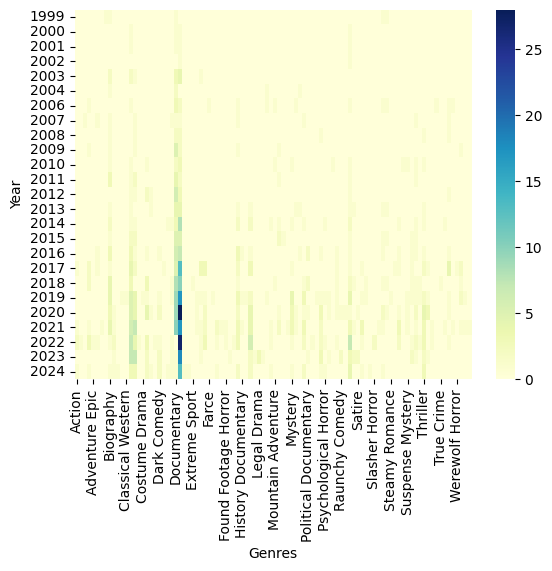

In [146]:
genre_year = df_movies.explode('Genres').groupby(['Year', 'Genres']).size().unstack()

# Plot heatmap
sns.heatmap(genre_year.fillna(0), cmap='YlGnBu')

In [110]:
import seaborn as sns